In [1]:
from matplotlib import pyplot as plt
import numpy as np
from random import randint, seed
from tqdm.notebook import tqdm

# Initialize random number seed (for reproducibility)
seed(42)


## Convenience functions

In [2]:
# Function that returns the estimate of fac(n) for large numbers
# - If n is a scalar, it returns a scalar
# - If n is an array, it returns an array

def large_num_factorial(n):
    if isinstance(n, np.ndarray):
        f = np.zeros(shape=n.shape)
        for i, el in enumerate(n):
            f[i] = np.log(range(2, el + 1)).sum()
    elif isinstance(n, int):
        f = 0.
        for j in range(2, n + 1):
            f += np.log(j)
    else:
        print('Error: input is not an integer nor an array of integers.')
        return -1
    
    return f

In [3]:
# Function to plot the distributions
def plot_distributions(distribution, analytical_distribution, N=100, P=5, format_fig='pdf'):
    xbins = list(range(len(distribution)))
    with plt.rc_context({"figure.dpi": 150}):
        ax=plt.bar(xbins, height=distribution, width=0.4, label='Statistical')
        ax=plt.plot(xbins, analytical_distribution, 'ro', label='Analytical')
    
    
    plt.xlabel('N')
    plt.legend(loc="best")
    plt.title(f"Probability of having N particles out of {N} in a compartment (out of {P})", fontsize=10)
    plt.savefig(f"N_{N}_P_{P}_.{format_fig}")

In [4]:
# Function to distribute particles in compartments and calculate the distribution.
# It also calculates the analytical distribution.

def divide_particles_compartment(N=100, P=5, Ncycles=10000):
    # Print to screen
    print(f"Number of particles: {N}")
    print(f"Number of compartments: {P}")
    print(f"Number of cycles (for average): {Ncycles}")

    if (P < 2) | (P > 1000) | (N < 2) | (N > 1000):
        print("Error in input parameters.")
        return -1

    #  Initialize arrays
    distribution = np.zeros(shape=(P, N), dtype=int)
    particles_in_compartment = np.zeros(
        shape=(P,), dtype=int
    )     

    # Distribute particles
    for cycle in tqdm(range(Ncycles)):

        # START EXERCISE (see below) 
        distribute_particles_over_compartments(N, P, particles_in_compartment)
        # END EXERCISE

        # Make a histogram (for the distribution)
        for j in range(P):
            distribution[j, particles_in_compartment[j]] += 1.0
            particles_in_compartment[j] = 0

    # Normalize distribution and average over compartments.
    # This is the probability of having n particles in a compartment.
    distribution = np.true_divide(distribution, Ncycles).mean(0)

    # Calculate analytical distribution
    analytical_distribution = np.fromfunction(
        lambda x: np.exp(
            large_num_factorial(N)
            - large_num_factorial(x)
            - large_num_factorial(N - x)
            - x * np.log(P)
            - (N - x) * np.log(P / (P - 1))
        ),
        (N,),
        dtype=int,
    )

    return distribution, analytical_distribution

In [5]:
def main(N, P):
    # Calculate the distribution of N particles in P compartments
    distribution, analytical_distribution = divide_particles_compartment(N=N, P=P)
    # Plot the distributions
    plot_distributions(distribution, analytical_distribution, N=N, P=P)

# EXERCISE: complete the function below, needed for the function `divide_particles_compartment`

In [ ]:
# Distribute particles over the compartments
def distribute_particles_over_compartments(N, P, particles_in_compartment):
    """
    N: Number of particles
    P: Number of compartments
    particles_in_compartment: array containing the number of particles per compartment
    
    Instructions:
    - Loop over all particles, pick a random compartment, and add a particle to it.
    - A random integer in the interval [0,N] can be generated using randint(0, N).
    
    NB: A python array with N elements is indexed from 0 to N-1     
    """
    # Your code here...
    return particles_in_compartment  

# SOLUTION (execute this cell if you wish to see the solution)

In [6]:
# %load solutions/particle_distribution.py
def distribute_particles_over_compartments(N, P, particles_in_compartment):
    """
    N: Number of particles
    P: Number of compartments
    particles_in_compartment: array containing the number of particles per compartment
    
    Instructions:
    - Loop over all particles, pick a random compartment, and add a particle to it.
    - A random integer in the interval [0,N] can be generated using randint(0, N).
    
    NB: A python array with N elements is indexed from 0 to N-1     
    """
    for i in range(N):
        random_index = randint(0, P - 1)
        particles_in_compartment[random_index] += 1
        
    return particles_in_compartment  

# Run the program

Number of particles: 200
Number of compartments: 5
Number of cycles (for average): 10000


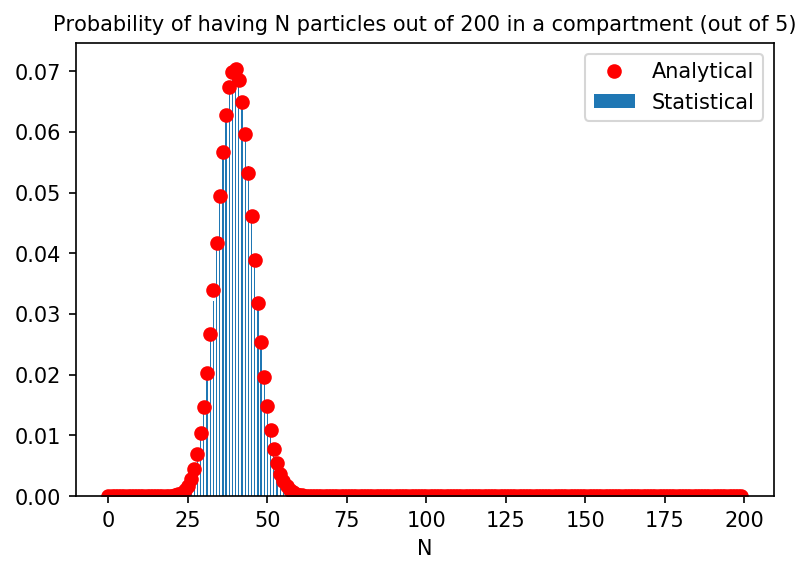

In [7]:
main(N=200, P=5)